# Player evaluation

Here we compare players based on their adjusted points. Also, we calculate some useful metrics using the adjusted points to further evaluate player performance in FPL.

In [1]:
# recent gameweek
gameweek = 23

In [2]:
# import basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.set_option('max_columns',100)

In [3]:
# fetch FPL data
filepath = '../data/fpl/data_week' + str(gameweek) + '.csv'
df = pd.read_csv(filepath, index_col=0)

# fetch team data
filepath = '../data/fbref/team_stats_week' + str(gameweek) + '.csv'
teamStats = pd.read_csv(filepath, index_col=0)

# fetch player stats data
filepath = '../data/fbref/player_stats_week' + str(gameweek) + '.csv'
playerStats = pd.read_csv(filepath, index_col=0, skiprows=1)

## Value and value points

Here we calculate two interesting metrics: 'value' and 'value points'. 

Value is simply adjusted points per game divided by the cost of the player. Essentially, this measures how many 'points per pound(/euro/whatever)' has the player gained on an average game week. 

The value points is calculated as the geometric mean of a players adjusted points per game and value. Essentially, in FPL we want to gain the maximum possible amount of points. However, we are restrained by a limited budget, so that in practice we cannot just pick all the best players. Then, we would like to have a squad of players that give the most points given our budget. Thus, we would like to pick players that have high value ('bang for buck'). However, often the players with highest value are very cheap players who somewhat overperform relative to their price. Picking a squad full of these players might leave a part of our budget unused. Calculating the geometric mean of adjusted points and value allows us to weigh both aspects equally, i.e. we want players that both gain a lot of points but also have good value. For example, this metric values equally two players, where one has twice the points per game of the other who in turn has twice the value of the other.

In [4]:
# value = expected points / cost
df['value'] = df['adjusted points per game'] / (df['now_cost'] / 10.0)
df['value form 5'] = df['form 5'] / (df['now_cost'] / 10.0)
df['value form 10'] = df['form 10'] / (df['now_cost'] / 10.0)
# geometric mean of 'adjusted points per game' and 'value'
df['valuePoints metric'] = np.sqrt(df['adjusted points per game'] * df['value'])

In [5]:
df['xG+xA'] = df['xG'] + df['xA']
df['xG+xA per game'] = df['xG+xA'] / df['games played']

In [6]:
goalkeepers = df['element_type'] == 1
defenders = df['element_type'] == 2
midfielders = df['element_type'] == 3
forwards = df['element_type'] == 4

minGames = df['games played'] >= 2

## Player evaluation

Below we compile lists for each position sorting players based on a given metric.

Notice that 'next1_xP' is currently based on preseason expectations on average player performance!

In [7]:
metric = 'valuePoints metric'
#metric = 'adjusted points per game'
#metric = 'next1_xP'

numberToShow = 40

print('GOALKEEPERS')
display(df[goalkeepers & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP', 'valuePoints metric']].head(20))
print('DEFENDERS')
display(df[defenders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('MIDFIELDERS')
display(df[midfielders & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))
print('FORWARDS')
display(df[forwards & minGames].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                  'next5_xP','valuePoints metric']].head(numberToShow))

GOALKEEPERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,52,21.090909,116,95.811788,5.5,4.542800,4.497400,4.559505,1.992150
560,Kelleher,Liverpool,45,2.000000,10,8.378329,5.0,4.189164,4.331484,4.377501,1.974791
96,Pope,Burnley,55,20.816327,102,93.010866,4.9,4.468169,3.869793,4.744287,1.905234
597,Sánchez,Brighton,45,12.093023,52,48.101671,4.3,3.977638,5.340149,4.260804,1.875077
431,Fabianski,West Ham,51,22.250000,89,88.755083,4.0,3.988992,2.950239,3.817950,1.766356
516,Areola,Fulham,45,20.810811,77,77.066258,3.7,3.703184,3.802269,3.725101,1.745698
383,Lloris,Tottenham,56,22.195122,91,90.230801,4.1,4.065344,3.480117,4.088101,1.717921
8,Leno,Arsenal,50,22.000000,88,82.970080,4.0,3.771367,3.285206,3.693421,1.686607
217,Schmeichel,Leicester City,55,22.857143,96,88.886782,4.2,3.888797,3.909592,3.808499,1.658188


DEFENDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
39,Hause,Aston Villa,44,4.000000,28,21.002236,7.0,5.250559,NaN,5.211916,2.503106
273,Stones,Manchester City,52,13.076923,85,65.776389,6.5,5.029959,4.570143,4.994726,2.205783
277,Cancelo,Manchester City,60,17.090909,94,92.115387,5.5,5.389730,3.949892,5.334289,2.200348
123,James,Chelsea,50,17.179487,67,75.114250,3.9,4.372322,4.516972,4.453396,1.955362
75,Bernardo,Brighton,39,2.941176,5,11.316130,1.7,3.847484,NaN,4.189298,1.948249
556,Dias,Manchester City,61,20.000000,98,93.348188,4.9,4.667409,5.003492,4.634282,1.889779
470,Kilman,Wolves,40,13.947368,53,52.648239,3.8,3.774779,4.226774,3.679065,1.887390
576,Dawson,West Ham,45,8.000000,44,31.379356,5.5,3.922419,4.183573,3.739891,1.849046
461,Saïss,Wolves,49,13.913043,64,56.514108,4.6,4.061951,2.043213,3.980291,1.835003


MIDFIELDERS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
271,Gündogan,Manchester City,60,17.049180,104,94.068773,6.1,5.517495,6.423432,5.374216,2.252508
105,Jorginho,Chelsea,47,15.106383,71,68.475336,4.7,4.532874,5.644700,4.657536,2.090859
272,De Bruyne,Manchester City,118,16.964286,95,117.859387,5.6,6.947501,4.622321,6.726406,2.022496
301,Lingard,West Ham,60,2.000000,18,9.723710,9.0,4.861855,NaN,4.801226,1.984844
302,Fernandes,Manchester Utd,115,23.150685,169,155.708181,7.3,6.725856,6.535963,6.418430,1.983347
24,Saka,Arsenal,54,20.238095,85,91.273080,4.2,4.509964,6.664971,4.424842,1.940779
37,Grealish,Aston Villa,78,21.166667,127,111.005973,6.0,5.244377,4.219567,5.177036,1.877788
390,Son,Tottenham,96,22.142857,155,124.332760,7.0,5.615028,4.319092,5.422816,1.812242
203,Harrison,Leeds United,54,21.111111,95,87.862791,4.5,4.161922,4.236562,3.979548,1.791006


FORWARDS


,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
202,Bamford,Leeds United,68,22.033898,130,120.941455,5.9,5.488881,4.650852,5.204115,2.104890
388,Kane,Tottenham,110,20.133333,151,131.452000,7.5,6.529073,5.800000,6.282840,1.968590
514,Watkins,Aston Villa,64,20.833333,100,102.500727,4.8,4.920035,4.416667,4.836576,1.944815
506,Wilson,Newcastle Utd,67,21.090909,116,105.421091,5.5,4.998414,4.366077,4.912483,1.931056
224,Vardy,Leicester City,100,18.870968,117,110.261455,6.2,5.842915,3.800000,5.717967,1.847692
164,Calvert-Lewin,Everton,77,20.000000,120,100.950909,6.0,5.047545,5.847545,4.883228,1.819009
377,Adams,Southampton,58,21.025641,82,85.841091,3.9,4.082686,3.338036,4.005173,1.695243
437,Antonio,West Ham,67,15.116279,65,66.170545,4.3,4.377436,5.965697,4.346478,1.691151
68,Maupay,Brighton,61,21.111111,76,86.770182,3.6,4.110167,4.280000,4.249343,1.664158


Below we compile a list sorting players based on a given metric (irrespective of position).

In [8]:
metric = 'adjusted points per game'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next5_xP,valuePoints metric
id,,,,,,,,,,
272,De Bruyne,Manchester City,118,16.964286,95,117.859387,5.6,6.947501,6.726406,2.022496
302,Fernandes,Manchester Utd,115,23.150685,169,155.708181,7.3,6.725856,6.418430,1.983347
388,Kane,Tottenham,110,20.133333,151,131.452000,7.5,6.529073,6.282840,1.968590
254,Salah,Liverpool,126,22.142857,155,135.463602,7.0,6.117711,6.039476,1.723470
224,Vardy,Leicester City,100,18.870968,117,110.261455,6.2,5.842915,5.717967,1.847692
390,Son,Tottenham,96,22.142857,155,124.332760,7.0,5.615028,5.422816,1.812242
251,Mané,Liverpool,119,20.192308,105,112.934266,5.2,5.592935,5.524274,1.621311
271,Gündogan,Manchester City,60,17.049180,104,94.068773,6.1,5.517495,5.374216,2.252508
202,Bamford,Leeds United,68,22.033898,130,120.941455,5.9,5.488881,5.204115,2.104890


In [9]:
metric = 'valuePoints metric'

display(df[minGames & midfielders & (df['now_cost']<63)].sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,
271,Gündogan,Manchester City,60,17.049180,6.1,5.517495,6.423432,5.355045,5.374216,2.252508
105,Jorginho,Chelsea,47,15.106383,4.7,4.532874,5.644700,4.918856,4.657536,2.090859
301,Lingard,West Ham,60,2.000000,9.0,4.861855,NaN,5.198324,4.801226,1.984844
24,Saka,Arsenal,54,20.238095,4.2,4.509964,6.664971,5.218990,4.424842,1.940779
203,Harrison,Leeds United,54,21.111111,4.5,4.161922,4.236562,3.861587,3.979548,1.791006
23,Smith Rowe,Arsenal,43,9.000000,4.0,3.702115,3.240610,4.063309,3.647111,1.785318
570,Raphinha,Leeds United,53,17.045455,4.4,4.109014,5.590000,3.812053,3.928860,1.784842
284,Foden,Manchester City,61,16.938776,4.9,4.359002,4.704191,4.267244,4.273161,1.764908
474,Neto,Wolves,57,23.023256,4.3,4.187539,4.902059,4.163753,4.213210,1.753967


In [10]:
metric = 'form 5'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game', 'form 5',\
                                                        'next5_xP','valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,form 5,next5_xP,valuePoints metric
id,,,,,,,,,,,
79,Alzate,Brighton,43,8.928571,25,23.672063,2.8,2.651271,7.348812,2.751847,1.278556
568,Telles,Manchester Utd,54,7.096774,22,24.966618,3.1,3.518023,6.703519,3.480228,1.513916
24,Saka,Arsenal,54,20.238095,85,91.273080,4.2,4.509964,6.664971,4.424842,1.940779
302,Fernandes,Manchester Utd,115,23.150685,169,155.708181,7.3,6.725856,6.535963,6.418430,1.983347
271,Gündogan,Manchester City,60,17.049180,104,94.068773,6.1,5.517495,6.423432,5.374216,2.252508
251,Mané,Liverpool,119,20.192308,105,112.934266,5.2,5.592935,6.213339,5.524274,1.621311
437,Antonio,West Ham,67,15.116279,65,66.170545,4.3,4.377436,5.965697,4.346478,1.691151
17,Tierney,Arsenal,52,17.105263,65,61.649924,3.8,3.604149,5.863273,3.505647,1.580524
164,Calvert-Lewin,Everton,77,20.000000,120,100.950909,6.0,5.047545,5.847545,4.883228,1.819009


In [11]:
metric = 'next1_xP'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','total_points','adjusted points','points_per_game','adjusted points per game',metric,\
                                                  'valuePoints metric']].head(numberToShow))

,web_name,team_name,now_cost,games played,total_points,adjusted points,points_per_game,adjusted points per game,next1_xP,valuePoints metric
id,,,,,,,,,,
302,Fernandes,Manchester Utd,115,23.150685,169,155.708181,7.3,6.725856,7.869945,1.983347
272,De Bruyne,Manchester City,118,16.964286,95,117.859387,5.6,6.947501,6.689278,2.022496
224,Vardy,Leicester City,100,18.870968,117,110.261455,6.2,5.842915,5.792981,1.847692
254,Salah,Liverpool,126,22.142857,155,135.463602,7.0,6.117711,5.478178,1.723470
277,Cancelo,Manchester City,60,17.090909,94,92.115387,5.5,5.389730,5.377067,2.200348
271,Gündogan,Manchester City,60,17.049180,104,94.068773,6.1,5.517495,5.355045,2.252508
276,Sterling,Manchester City,116,19.824561,113,106.940816,5.7,5.394360,5.225119,1.583839
24,Saka,Arsenal,54,20.238095,85,91.273080,4.2,4.509964,5.218990,1.940779
301,Lingard,West Ham,60,2.000000,18,9.723710,9.0,4.861855,5.198324,1.984844


In [12]:
metric = 'xG'

display(df.sort_values(by=[metric], ascending=False)[['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','next1_xP',\
                      'valuePoints metric', 'xG', 'xA', 'xG+xA', 'xG+xA per game']].head(numberToShow))

,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,next1_xP,valuePoints metric,xG,xA,xG+xA,xG+xA per game
id,,,,,,,,,,,,
224,Vardy,Leicester City,100,18.870968,6.2,5.842915,5.792981,1.847692,12.5,2.5,15.0,0.794872
202,Bamford,Leeds United,68,22.033898,5.9,5.488881,5.056011,2.104890,12.2,2.5,14.7,0.667154
254,Salah,Liverpool,126,22.142857,7.0,6.117711,5.478178,1.723470,12.0,3.4,15.4,0.695484
514,Watkins,Aston Villa,64,20.833333,4.8,4.920035,4.360629,1.944815,11.4,2.1,13.5,0.648000
302,Fernandes,Manchester Utd,115,23.150685,7.3,6.725856,7.869945,1.983347,10.7,8.7,19.4,0.837988
388,Kane,Tottenham,110,20.133333,7.5,6.529073,5.174142,1.968590,10.6,4.9,15.5,0.769868
164,Calvert-Lewin,Everton,77,20.000000,6.0,5.047545,4.766484,1.819009,10.2,0.9,11.1,0.555000
68,Maupay,Brighton,61,21.111111,3.6,4.110167,4.197920,1.664158,9.5,1.6,11.1,0.525789
506,Wilson,Newcastle Utd,67,21.090909,5.5,4.998414,4.329084,1.931056,9.5,2.0,11.5,0.545259


## Player Visualizations

In [13]:
game_weeks = np.arange(1,gameweek+1)
column_xPoints = []
column_xG = []
column_xA = []
column_xGA = []
for i in range(1,gameweek+1):
    column_xPoints.append('xPoints week ' + str(i))
    column_xG.append('xG_week' + str(i))
    column_xA.append('xA_week' + str(i))
    column_xGA.append('xGA_week' + str(i))

#display(game_weeks)
#display(column_xPoints)

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week22,assists_week23,assists_week3,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,cleansheet_week14,cleansheet_week15,cleansheet_week16,cleansheet_week17,cleansheet_week18,cleansheet_week19,cleansheet_week2,cleansheet_week20,cleansheet_week21,cleansheet_week22,cleansheet_week23,cleansheet_week3,cleansheet_week4,...,xGA_week9,xG_points,xG_week1,xG_week10,xG_week11,xG_week12,xG_week13,xG_week14,xG_week15,xG_week16,xG_week17,xG_week18,xG_week19,xG_week2,xG_week20,xG_week21,xG_week22,xG_week23,xG_week3,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 22,xPoints week 23,xPoints week 3,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
390,124.33276,5.615028,6,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,20,493,100.0,100.0,6.791669,9,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.2,36.0,0.1,0.0,0.0,0.1,0.5,0.5,0.0,NaN,0.2,0.9,0.3,1.3,0.1,0.1,0.2,0.3,0.1,0.5,0.5,0.3,0.2,0.5,0.4,6.540818,3.646597,2.332871,6.329538,4.679671,8.067879,5.301897,2.70657,NaN,7.835598,6.90657,6.091898,11.601897,2.622456,2.949569,3.390718,6.540818,2.1,11.968706,8.213491,7.106531,3.606531,5.249329,6.301194,0


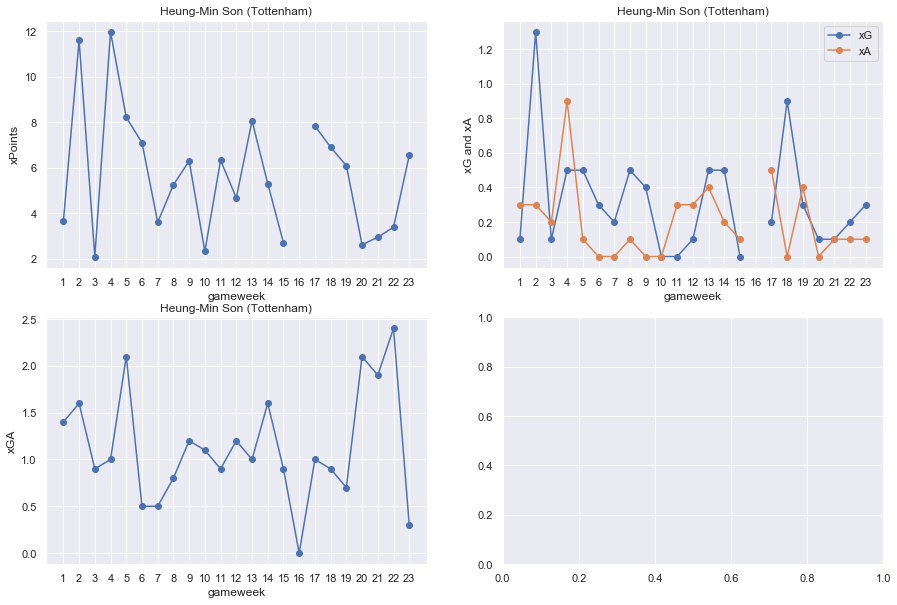

In [14]:
# find player index
name_string = 'Son'
playersFound = df[df['web_name'].str.contains(name_string)]
display(playersFound)
# plot xPoints over time
ix = playersFound.index[0]
#ix = 251

fig,ax = plt.subplots(2,2,figsize=(15,10))

ax[0,0].plot(game_weeks, df.loc[ix,column_xPoints], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,0].set_title(title_string)
ax[0,0].set_xlabel('gameweek')
ax[0,0].set_ylabel('xPoints')
ax[0,0].set_xticks(game_weeks)

ax[0,1].plot(game_weeks, df.loc[ix,column_xG], marker='o')
ax[0,1].plot(game_weeks, df.loc[ix,column_xA], marker='o')
ax[0,1].legend(('xG','xA'))
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[0,1].set_title(title_string)
ax[0,1].set_xlabel('gameweek')
ax[0,1].set_ylabel('xG and xA')
ax[0,1].set_xticks(game_weeks)

ax[1,0].plot(game_weeks, df.loc[ix,column_xGA], marker='o')
title_string = df.loc[ix,'first_name'] + ' ' + df.loc[ix,'second_name'] + ' (' + df.loc[ix,'team_name'] + ')'
ax[1,0].set_title(title_string)
ax[1,0].set_xlabel('gameweek')
ax[1,0].set_ylabel('xGA')
ax[1,0].set_xticks(game_weeks)

plt.show()

## My team

In [21]:
# find player index
df[df['web_name'].str.contains('Fode')]

,adjusted points,adjusted points per game,assists,assists_week1,assists_week10,assists_week11,assists_week12,assists_week13,assists_week14,assists_week15,assists_week16,assists_week17,assists_week18,assists_week19,assists_week2,assists_week20,assists_week21,assists_week22,assists_week23,assists_week3,assists_week4,assists_week5,assists_week6,assists_week7,assists_week8,assists_week9,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheet_points,clean_sheets,cleansheet_week1,cleansheet_week10,cleansheet_week11,cleansheet_week12,cleansheet_week13,cleansheet_week14,cleansheet_week15,cleansheet_week16,cleansheet_week17,cleansheet_week18,cleansheet_week19,cleansheet_week2,cleansheet_week20,cleansheet_week21,cleansheet_week22,cleansheet_week23,cleansheet_week3,cleansheet_week4,...,xGA_week9,xG_points,xG_week1,xG_week10,xG_week11,xG_week12,xG_week13,xG_week14,xG_week15,xG_week16,xG_week17,xG_week18,xG_week19,xG_week2,xG_week20,xG_week21,xG_week22,xG_week23,xG_week3,xG_week4,xG_week5,xG_week6,xG_week7,xG_week8,xG_week9,xPoints,xPoints week 1,xPoints week 10,xPoints week 11,xPoints week 12,xPoints week 13,xPoints week 14,xPoints week 15,xPoints week 16,xPoints week 17,xPoints week 18,xPoints week 19,xPoints week 2,xPoints week 20,xPoints week 21,xPoints week 22,xPoints week 23,xPoints week 3,xPoints week 4,xPoints week 5,xPoints week 6,xPoints week 7,xPoints week 8,xPoints week 9,yellow_cards
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
284,73.83615,4.359002,5,NaN,1.0,NaN,NaN,0.0,NaN,0.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,NaN,2.0,0.0,0.0,1.0,0.0,0.0,NaN,0.0,11,284,NaN,NaN,8.185241,5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.7,16.0,NaN,0.1,NaN,NaN,0.0,NaN,0.0,NaN,0.5,0.1,0.6,0.4,0.2,-0.1,NaN,0.3,0.0,0.2,0.6,0.3,0.0,NaN,0.0,10.652895,NaN,3.090119,NaN,NaN,2.97032,NaN,1.0,NaN,10.764304,6.17032,7.949329,6.367879,2.0,2.918731,NaN,10.652895,2.074274,3.501897,6.697604,2.5,1.0,NaN,1.0,0
350,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [22]:
my_starting11 = [12,232,558,277,271,302,37,284,251,202,437]
my_subs = [213,506,200,146]

In [23]:
print('STARTING 11')
display(df.loc[my_starting11, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))
print('\nSUBSTITUTES')
display(df.loc[my_subs, ['web_name','team_name','now_cost',\
          'games played','points_per_game','adjusted points per game','form 5','form 10','next1_xP','next5_xP',\
                                                  'valuePoints metric']].head(numberToShow))

STARTING 11


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
12,Martínez,Aston Villa,52,21.090909,5.5,4.542800,4.497400,4.804058,4.426796,4.559505,1.992150
232,Chilwell,Chelsea,59,18.125000,4.8,4.290233,3.432684,2.924270,4.928181,4.367023,1.766261
558,Coufal,West Ham,47,18.974359,3.9,3.975350,3.866125,3.751357,4.714248,3.795160,1.833692
277,Cancelo,Manchester City,60,17.090909,5.5,5.389730,3.949892,5.011848,5.377067,5.334289,2.200348
271,Gündogan,Manchester City,60,17.049180,6.1,5.517495,6.423432,5.935488,5.355045,5.374216,2.252508
302,Fernandes,Manchester Utd,115,23.150685,7.3,6.725856,6.535963,7.413113,7.869945,6.418430,1.983347
37,Grealish,Aston Villa,78,21.166667,6.0,5.244377,4.219567,4.975478,4.736014,5.177036,1.877788
284,Foden,Manchester City,61,16.938776,4.9,4.359002,4.704191,5.181947,4.267244,4.273161,1.764908
251,Mané,Liverpool,119,20.192308,5.2,5.592935,6.213339,5.680702,4.998044,5.524274,1.621311



SUBSTITUTES


,web_name,team_name,now_cost,games played,points_per_game,adjusted points per game,form 5,form 10,next1_xP,next5_xP,valuePoints metric
id,,,,,,,,,,,
213,Meslier,Leeds United,47,21.190476,4.2,3.594253,4.886211,4.461129,3.510664,3.600078,1.657905
506,Wilson,Newcastle Utd,67,21.090909,5.5,4.998414,4.366077,4.229646,4.329084,4.912483,1.931056
200,Dallas,Leeds United,48,22.093023,4.3,3.176005,4.384283,3.947168,2.955623,3.091840,1.449641
146,Mitchell,Crystal Palace,39,11.785714,2.8,2.666320,1.304635,3.133596,3.434129,3.002513,1.350143


## Save data

In [18]:
# save data
filepath = '../data/fpl/data_week' + str(gameweek) + str('.csv')
df.to_csv(filepath)